In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [56]:
train_df = pd.read_csv('resources/2019loans.csv')

In [57]:
test_df = pd.read_csv("resources/2020Q1loans.csv")

In [58]:
#train data process

In [59]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [60]:
train_df.shape

(12180, 86)

In [61]:
len(train_df)

12180

Cleanning data

In [62]:
pd.options.display.min_rows = 90
train_df.isnull().sum()

Unnamed: 0                    0
index                         0
loan_amnt                     0
int_rate                      0
installment                   0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
                             ..
mo_sin_o

In [63]:
# Convert categorical data to numeric and separate target feature for training data
X = train_df.drop('loan_status', axis=1)

In [64]:
X.head(5)

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,n,29.99,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,n,11.26,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,n,11.28,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,n,18.08,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,n,27.77,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [65]:
x_train = pd.get_dummies(X)

x_train.head(5)

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,0,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,0,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,0,1,0,1,1,0,1,0,1,0


In [66]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 94 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           12180 non-null  int64  
 1   index                                12180 non-null  int64  
 2   loan_amnt                            12180 non-null  float64
 3   int_rate                             12180 non-null  float64
 4   installment                          12180 non-null  float64
 5   annual_inc                           12180 non-null  float64
 6   dti                                  12180 non-null  float64
 7   delinq_2yrs                          12180 non-null  float64
 8   inq_last_6mths                       12180 non-null  float64
 9   open_acc                             12180 non-null  float64
 10  pub_rec                              12180 non-null  float64
 11  revol_bal                   

In [67]:
y_train = LabelEncoder().fit_transform(train_df['loan_status'])
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [68]:
#Test Data process
#Convert categorical data to numeric and separate target feature for testing data

In [69]:
test_df['loan_status'].unique()

array(['low_risk', 'high_risk'], dtype=object)

In [70]:
print (test_df.isnull().sum())

Unnamed: 0                    0
index                         0
loan_amnt                     0
int_rate                      0
installment                   0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
                             ..
mo_sin_o

In [71]:
Xtest = test_df.drop('loan_status', axis=1)

In [72]:
x_test = pd.get_dummies(Xtest)


In [73]:
y_test = LabelEncoder().fit_transform(test_df['loan_status'])
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [74]:
 # add missing dummy variables to testing set

In [75]:
missing_cols = set( x_train.columns ) - set( x_test.columns )
missing_cols

{'debt_settlement_flag_Y'}

In [76]:
for c in missing_cols:
    x_test[c] = 0

In [77]:
x_test.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,1,0,1,1,0,1,0,1,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,1,0,1,1,0,1,0,1,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,1,0,1,1,0,1,0,1,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,1,0,1,1,0,1,0,1,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,1,0,1,1,0,1,0,1,0


In [78]:
y_test[1:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

# Predict which model will be best and why

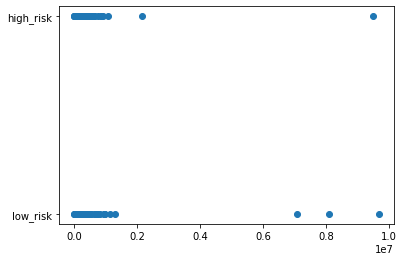

In [79]:
plt.scatter(train_df['annual_inc'], train_df['loan_status'])

In [80]:
#I think Random Forest Classifier will be better because the data has a lot of categorical data
#and logistic regression tends to not do as well with this type of data.
#Also I checked one of the number variables which is annual income, thinking the more income one has the lower risk it will be
#but clearly more factors will be needed to make this desition

In [81]:
#Models with NOT scaled data
train_df.shape

(12180, 86)

# Train the Logistic Regression model on unscaled data and print the model score

In [82]:

x_train.shape

(12180, 94)

In [83]:
x_test.shape

(4702, 94)

In [84]:
clf = LogisticRegression(max_iter=200000).fit(x_train, y_train)
print(f'Training Score: {clf.score(x_train, y_train)}')
print(f'Testing Score: {clf.score(x_test, y_test)}')

Training Score: 0.7004105090311987
Testing Score: 0.562951935346661


C:\Users\edipa\Anaconda3\envs\newvenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
#This model is not doing so well. Maybe when the data is scaled like it's suggesting in the warning, the logisticregresion model 
#can perform better and the test data also could do better. 
#


 # Train a Random Forest Classifier model on unscaled data and print the model score

In [86]:
clf = RandomForestClassifier(random_state=1).fit(x_train, y_train)


In [87]:
 print(f'Training Score: {clf.score(x_train, y_train)}')

Training Score: 1.0


In [88]:
 print(f'Testing Score: {clf.score(x_test, y_test)}')

Testing Score: 0.6405784772437261


In [89]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [90]:
 from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.40      0.52      2351
           1       0.59      0.89      0.71      2351

    accuracy                           0.64      4702
   macro avg       0.68      0.64      0.62      4702
weighted avg       0.68      0.64      0.62      4702



In [92]:
#This model is probably overfitting because having a perfect score in the training data means the data addapted so well to the model, 
#and the testing data has a slight change the model won't do so well as it is in this case of getting a 64% 

# Train the Logistic Regression model using scaled data and print the model score

In [93]:
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [94]:
clf = LogisticRegression(max_iter = 10000).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.7128899835796387
Testing Score: 0.7203317737133135


In [95]:
#I think here the model is doing ok because they are close to eachother the training and the testing score 
#and they are not that low, although the training score data has a lower score but not that far off.


# Train the Random Forest Classifier model on scaled data and print the model score

In [96]:
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.78      0.40      0.53      2351
           1       0.60      0.89      0.71      2351

    accuracy                           0.64      4702
   macro avg       0.69      0.64      0.62      4702
weighted avg       0.69      0.64      0.62      4702

Training Score: 1.0
Testing Score: 0.6418545299872395


In [97]:
#Scaling the data in this model didn't help. It still seems to overfit. We got the same results as the unscaled data.

# Train the Logistic Regression model on unscaled and split data and print the model score

In [98]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x_train, y_train, random_state=1)

In [99]:
clf = LogisticRegression(max_iter=200000).fit(X1_train, y1_train)
print(f'Training Score: {clf.score(X1_train, y1_train)}')
print(f'Testing Score: {clf.score(X1_test, y1_test)}')

Training Score: 0.7009304871373837
Testing Score: 0.7060755336617406


C:\Users\edipa\Anaconda3\envs\newvenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
#Here the scores are about the same, I would say 70 percent accuracy for both.

# Train the Random Forest Classifier model on unscaled and split data and print the model score

In [101]:
clf = RandomForestClassifier(random_state=1).fit(X1_train, y1_train)
print(f'Training Score: {clf.score(X1_train, y1_train)}')
print(f'Testing Score: {clf.score(X1_test, y1_test)}')

Training Score: 1.0
Testing Score: 0.7865353037766831


In [ ]:
#The score here is still overfitting but with a better testing score.

# Train the Logistic Regression model on scaled and split data and print the model score

In [102]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x_train, y_train, random_state=1)
scaler = StandardScaler().fit(X1_train)
X_train_scaled = scaler.transform(X1_train)
X_test_scaled = scaler.transform(X1_test)


In [42]:
#Added some different parameters to see if I get a better score. It takes like 15 mins to run this step

In [168]:
logclf = LogisticRegression()
param_grid = [{'penalty':['l1','l2','elasticnet','none'], 
               'C': np.logspace(-4, 4, 20),
              'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter':[100,1000,2500,5000]}]
clf = GridSearchCV(logclf, param_grid = param_grid, cv = 3, verbose= True, n_jobs = -1)
bestclf = clf.fit(X_train_scaled, y1_train)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\edipa\Anaconda3\envs\newvenv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\edipa\Anaconda3\envs\newvenv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edipa\Anaconda3\envs\newvenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\edipa\Anaconda3\envs\newvenv\lib\site-packages\sklearn\linear_model\_logistic.p

In [170]:
#si sirve le printeas
print('done')

done


In [171]:
print(f'Training Score: {bestclf.score(X_train_scaled, y1_train)}')
print(f'Testing Score from split data: {bestclf.score(X_test_scaled, y1_test)}')

Training Score: 0.7069512862616311
Testing Score from split data: 0.7169129720853858


In [172]:
bestclf.best_estimator_

LogisticRegression(C=4.281332398719396, max_iter=1000, penalty='l1',
                   solver='saga')

In [ ]:
#Not much changed from Regression model on unscaled and split but I can see saga solver gave us just a little bit better score

In [ ]:
#Try just as the previouse way without changing the solver or any other parameter 

In [103]:
clf = LogisticRegression(max_iter = 10000).fit(X_train_scaled, y1_train)
print(f'Training Score: {clf.score(X_train_scaled, y1_train)}')
print(f'Testing Score from split data: {clf.score(X_test_scaled, y1_test)}')

Training Score: 0.705528188286809
Testing Score from split data: 0.7178981937602628


In [104]:
#Try to fit the original testing data from 2020Q in to this new split model

In [105]:
scaler = StandardScaler().fit(x_test)
X_test_scaled = scaler.transform(x_test)
print(f'Training Score: {clf.score(X_train_scaled, y1_train)}')
print(f'Testing Score from 2020Q data: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.705528188286809
Testing Score from 2020Q data: 0.6631220757124627


# Train the Random Forest Classifier model on scaled and split data and print the model score

In [106]:
scaler = StandardScaler().fit(X1_train)
X_train_scaled = scaler.transform(X1_train)
X_test_scaled = scaler.transform(X1_test)

clf1 = RandomForestClassifier(random_state=1).fit(X_train_scaled, y1_train)
y1_pred = clf1.predict(X_test_scaled)
print(classification_report(y1_test, y1_pred))
print(f'Training Score: {clf1.score(X_train_scaled, y1_train)}')
print(f'Testing Score from split data: {clf1.score(X_test_scaled, y1_test)}')

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1499
           1       0.81      0.76      0.78      1546

    accuracy                           0.79      3045
   macro avg       0.79      0.79      0.79      3045
weighted avg       0.79      0.79      0.79      3045

Training Score: 1.0
Testing Score from split data: 0.7865353037766831


In [107]:
#Predict using the model of the split train scaled data vs 2020Q1 test data

In [108]:
scaler = StandardScaler().fit(x_test)
X_test_scaled = scaler.transform(x_test)
y1_pred = clf1.predict(X_test_scaled)

In [109]:
print(f'Training Score: {clf1.score(X_train_scaled, y1_train)}')
print(f'Testing Score from 2020Q data: {clf1.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score from 2020Q data: 0.5810293492131008


In [ ]:
#This last try didn't do well at all with the 2020Q1 data as a test.